In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('../input/train.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn

In [3]:
def format_(dataframe, feature, fillna='0.0', astype=np.float32, normalize=True):
    print('format', feature)
    dataframe[feature] = dataframe[feature].fillna(fillna)
    dataframe[feature] = dataframe[feature].astype(np.float32)
    if normalize:
        dataframe.loc[dataframe[feature]>1, feature] = 1
        dataframe.loc[dataframe[feature]<0, feature] = 0
    return dataframe

In [4]:
from sklearn.preprocessing import MinMaxScaler
def normalized_feature(dataframe, feature):
    print('start scale', feature)
    mms = MinMaxScaler()
    return mms.fit_transform(dataframe[feature].values.reshape(-1, 1))

In [5]:
# rate 1
posi_f = [
    'voice_connection', 'wifi_connection',
    'voice_convert_1', 'convert_rate',
    'rrc_connection', 'erab_connection',
    'esrvcc_convert',
    'video_connection', 'voice_convert_2', 'pdcch_cce'
]

# rate 0
navg_f = [
    'voice_disconnection', 'wifi_disconnection',
    'wifi_disconnection_1',
    'erab_trash', 'prb_pull', 'prb_push',
    'video_disconnection'
]

# count 
count_f = [
    'voice_pull_delay','voice_count', 'data_count', 
    'rrc_max', 'csgb_rrc', 'rrc_2g', 'rrc_3g', 'rrc_num',
    'voice_push_miss', 'voice_pull_miss'
]

for feature in posi_f:
    train = format_(train, feature, fillna=train[feature].mean())
    
for feature in navg_f:
    train = format_(train, feature, fillna=train[feature].mean())
    
for feature in count_f:
    train = format_(train, feature, fillna=train[feature].mean(), normalize=False)
    train[feature] = normalized_feature(train, feature)

format voice_connection
format wifi_connection
format voice_convert_1
format convert_rate
format rrc_connection
format erab_connection
format esrvcc_convert
format video_connection
format voice_convert_2
format pdcch_cce
format voice_disconnection
format wifi_disconnection
format wifi_disconnection_1
format erab_trash
format prb_pull
format prb_push
format video_disconnection
format voice_pull_delay
start scale voice_pull_delay
format voice_count
start scale voice_count
format data_count
start scale data_count
format rrc_max
start scale rrc_max
format csgb_rrc
start scale csgb_rrc
format rrc_2g
start scale rrc_2g
format rrc_3g
start scale rrc_3g
format rrc_num
start scale rrc_num
format voice_push_miss
start scale voice_push_miss
format voice_pull_miss
start scale voice_pull_miss


In [6]:
train.mr_low = train.mr_low.astype(np.float32)
train.mr_high = train.mr_high.astype(np.float32)

In [7]:
train['datetime'] = train['time'].apply(lambda x: str(x).split(' ')[0])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457665 entries, 0 to 8457664
Data columns (total 34 columns):
city                    object
region                  object
time                    object
cgi                     object
voice_connection        float32
wifi_connection         float32
video_connection        float32
voice_disconnection     float32
wifi_disconnection      float32
video_disconnection     float32
esrvcc_convert          float32
voice_convert_1         float32
convert_rate            float32
voice_convert_2         float32
voice_push_miss         float32
voice_pull_miss         float32
voice_pull_delay        float32
voice_count             float32
data_count              float32
rrc_connection          float32
erab_connection         float32
erab_trash              float32
wifi_disconnection_1    float32
prb_push                float32
prb_pull                float32
pdcch_cce               float32
rrc_max                 float32
csgb_rrc                flo

In [9]:
test_set = train[train.loc[:,('datetime')]=='2018-05-06']

train_set = train[train.loc[:,('datetime')]=='2018-05-05']
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-04']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-03']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-02']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-01']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-04-30']])

test_set = test_set.drop(['datetime'], axis=1)
train_set = train_set.drop(['datetime'], axis=1)

In [10]:
train_set.columns
# Index(['地市', '区县', '时间', 'CGI', 'VOLTE语音接通率', '无线接通率', 'VOLTE视频接通率',
#        'VOLTE语音掉话率', '无线掉线率', 'VOLTE视频掉话率', 'ESRVCC切换成功率',
#        'VOLTE语音用户QCI等于1切换成功率', '切换成功率', 'VOLTE视频用户QCI等于2切换成功率', 'VOLTE语音上行丢包率',
#        'VOLTE语音下行丢包率', 'VOLTE下行时延MS', 'VOLTE语音话务量ERL', '数据业务量GB', 'RRC连接建立成功率',
#        'ERAB建立成功率', 'ERAB拥塞率', '无线掉线率.1', '上行PRB平均利用率', '下行PRB平均利用率',
#        'PDCCH信道CCE占用率', 'RRC连接最大数', 'CSFB触发的RRC连接释放次数', '重定向到2G的RRC连接释放次数',
#        '重定向到3G的RRC连接释放次数', '有效RRC连接最大数'],
#       dtype='object')

Index(['city', 'region', 'time', 'cgi', 'voice_connection', 'wifi_connection',
       'video_connection', 'voice_disconnection', 'wifi_disconnection',
       'video_disconnection', 'esrvcc_convert', 'voice_convert_1',
       'convert_rate', 'voice_convert_2', 'voice_push_miss', 'voice_pull_miss',
       'voice_pull_delay', 'voice_count', 'data_count', 'rrc_connection',
       'erab_connection', 'erab_trash', 'wifi_disconnection_1', 'prb_push',
       'prb_pull', 'pdcch_cce', 'rrc_max', 'csgb_rrc', 'rrc_2g', 'rrc_3g',
       'rrc_num', 'mr_low', 'mr_high'],
      dtype='object')

In [121]:
# features = ['voice_convert_2', 'prb_pull', 'pdcch_cce', 'rrc_max']
# features = ['video_connection', 'prb_pull', 'rrc_max']
# features = ['data_count', 'prb_push', 'rrc_num', 'rrc_max', 'erab_trash']
# features = ['convert_rate', 'rrc_num', 'rrc_max']
# features = ['wifi_connection', 'erab_trash', 'erab_connection', 'rrc_connection']
# features = ['wifi_disconnection', 'erab_trash', 'erab_connection']
# features = ['voice_disconnection', 'rrc_3g']
# features = ['voice_count', 'rrc_3g']
features = ['voice_connection', 'esrvcc_convert']

In [122]:
train_ = train_set[features]
test_ = test_set[features]

In [123]:
train_.shape

(7243326, 2)

In [124]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import gc

In [125]:
test_y = test_[features[0]]
test_x = test_.drop([features[0]], axis=1)

In [126]:
train_y = train_[features[0]]
train_x = train_.drop([features[0]], axis=1)

In [127]:
trainx, validx, trainy, validy = train_test_split(
    train_x, 
    train_y, 
    test_size=0.1, 
    random_state=432423
)

In [128]:
train_data = lgb.Dataset(trainx, trainy)
valid_data = lgb.Dataset(validx, validy)

params = {
#     'application': 'binary',
    'boosting': 'gbdt',
    'num_leaves': 80,
    'min_data_in_leaf': 50,
    'learning_rate': 0.05,
    'zero_as_missing': True,
    'lambda_l1': 0,
    'lambda_l2': 0,
    'metric':{'mse'}
}

model = lgb.train(
    params, train_data, 1000,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    verbose_eval=50,
    early_stopping_rounds=100
)

Training until validation scores don't improve for 100 rounds.
[50]	train's l2: 0.000114701	valid's l2: 0.000131113
[100]	train's l2: 0.000114701	valid's l2: 0.000131113
[150]	train's l2: 0.000114701	valid's l2: 0.000131113
Early stopping, best iteration is:
[61]	train's l2: 0.000114701	valid's l2: 0.000131113


In [129]:
pre = model.predict(test_x)
from sklearn import metrics
valid_auc = metrics.mean_squared_error(test_y, pre)
print(valid_auc)

0.0001260559247919973


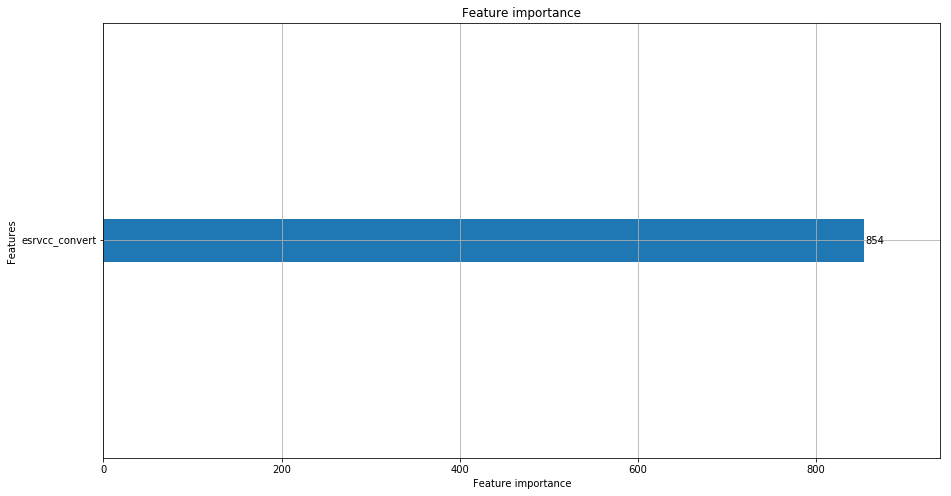

In [130]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小
lgb.plot_importance(booster=model)

In [131]:
def draw(real, pre, skip=0, n=10):
    al = []
    for i in range(n):
        al.append(i)

    ax1 = plt.subplot(221)
    ax1.set_title('pre')   
    ax1.plot(al, pre[skip:skip+n], 'r', label='pre')
    ax1.legend(bbox_to_anchor=[1, 1])  
    ax1.grid() 

    ax2 = plt.subplot(222)
    ax2.set_title('real')   
    ax2.plot(al, real[skip:skip+n].tolist(), 'b', label='real')
    ax2.legend(bbox_to_anchor=[1, 1])  
    ax2.grid() 

    ax3 = plt.subplot(212)
    ax3.set_title('pre & real')   
    ax3.plot(al, pre[skip:skip+n], 'r', label='pre')
    ax3.plot(al, real[skip:skip+n].tolist(), 'b', label='real')
    ax3.legend(bbox_to_anchor=[1, 1])  
    ax3.grid() 

    plt.show()

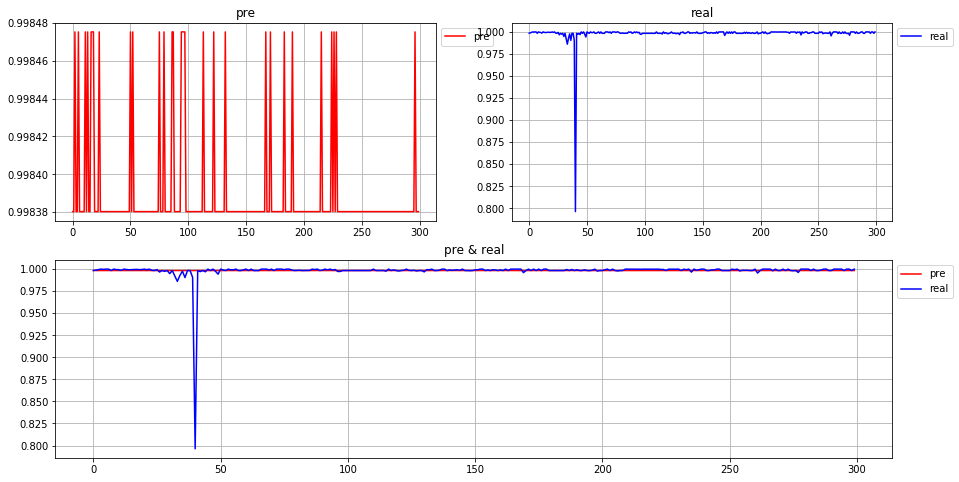

In [133]:
draw(test_y, pre, skip=3213, n=300)

In [134]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

In [182]:
features = ['voice_convert_2', 'prb_pull', 'pdcch_cce', 'rrc_max']
# features = ['video_connection', 'prb_pull', 'rrc_max']
# features = ['data_count', 'prb_push', 'rrc_num', 'rrc_max', 'erab_trash']
# features = ['convert_rate', 'rrc_num', 'rrc_max']
# features = ['wifi_connection', 'erab_trash', 'erab_connection', 'rrc_connection']
# features = ['wifi_disconnection', 'erab_trash', 'erab_connection']
# features = ['voice_disconnection', 'rrc_3g']
# features = ['voice_count', 'rrc_3g']
# features = ['voice_connection', 'esrvcc_convert']

In [183]:
n = 100
al = []
for i in range(n):
    al.append(i)
target = train[features]

In [184]:
from sklearn.preprocessing import MinMaxScaler
def normalized_feature(dataframe, feature):
    print('start scale', feature)
    mms = MinMaxScaler()
    return mms.fit_transform(dataframe[feature].values.reshape(-1, 1))

In [185]:
target = target.fillna(0)
for feature in features:
    target[feature]  = normalized_feature(target, feature)

start scale voice_convert_2
start scale prb_pull
start scale pdcch_cce
start scale rrc_max


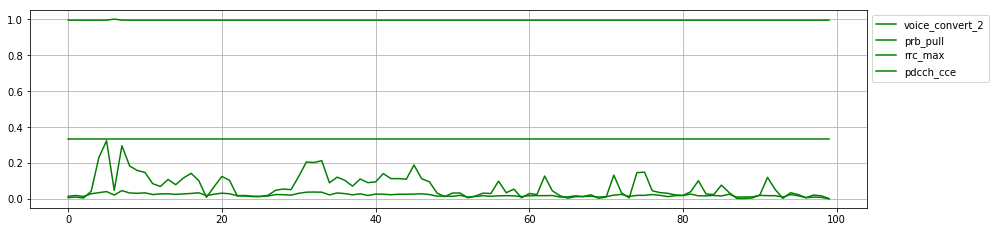

In [186]:
ax3 = plt.subplot(211)
ax3.plot(al, target['voice_convert_2'][:n].values, 'g', label='voice_convert_2')
ax3.plot(al, target['prb_pull'][:n].values, 'g', label='prb_pull')
ax3.plot(al, target['rrc_max'][:n].values, 'g', label='rrc_max')
ax3.plot(al, target['pdcch_cce'][:n].values, 'g', label='pdcch_cce')

ax3.legend(bbox_to_anchor=[1, 1])
ax3.grid()

In [170]:
target

,convert_rate,rrc_num,rrc_max
0,0.983221,0.005030,0.014047
1,0.991150,0.006036,0.018437
2,1.000000,0.005030,0.013169
3,0.990268,0.010060,0.028095
4,0.995587,0.013078,0.034241
5,0.990092,0.018109,0.040386
6,0.995184,0.009054,0.021071
7,0.995063,0.018109,0.045654
8,0.973050,0.014085,0.032485
9,0.997961,0.012072,0.030729
